In [13]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [14]:
#Set paths 

Animal_ID = ['EJT211','EJT212','EJT213','EJT214']
#['EJT60','EJT61','EJT62','EJT63','EJT64','EJT65','EJT68','EJT69','EJT70','EJT71','EJT72']
Cohort_name = 'PosterAnalysis'


 
 #,'EJT50',]
#,'EJT46', 'EJT47', 'EJT48', 'EJT49','EJT50']

#,'EJT40','EJT41','EJT42','EJT46', 'EJT47', 'EJT48', 'EJT49','EJT50']


InputPath = ('D:\Behavioural_data_output\\')

OutputPath = ('D:\Behavioural_data_output\\')

In [15]:
import scipy.io
import os, importlib
import matplotlib.pyplot as plt
import statistics
import scipy.stats
import numpy as np
import pandas as pd
from ast import literal_eval
import pickle
import matplotlib.patches as mpatches

In [16]:
def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def convolve_movmean(y,N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

def plot_across_animals(data,xlabel,ylabel,Animal_ID,windowsize):

    fig,ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_ylim([0, 1])
    for animals in range(len(Animal_ID)):
        ax.plot(data[animals][0:int(len(data[animals])*0.8)], color = 'grey',alpha = 0.5) ## only plot 90% of the data to avoid end of last session dip dominating the moving average. 

    cc_vecs = conactinate_nth_items(data)   
    medianPPerfs = [] 
    for item in cc_vecs:
        medianPPerfs = medianPPerfs + [np.median(item)]
    covlved_medianPPerfs = convolve_movmean(medianPPerfs,windowsize)

    ax.plot(covlved_medianPPerfs[0:int(len(covlved_medianPPerfs)*0.8)], color = 'firebrick')  

    patch1 = mpatches.Patch(color='grey', label=('n = ' + str(len(Animal_ID))))
    plt.legend(handles=[patch1])

    ax.set_xlabel(xlabel,fontsize = 20)
    ax.set_ylabel(ylabel,fontsize = 20)
    
    ax.set_xlim(0,8000)

def SaveFig(file_name,figure_dir):
    if not os.path.isdir(figure_dir):
        os.makedirs(figure_dir)
    plt.savefig(figure_dir + file_name, bbox_inches='tight')
    plt.close()

In [17]:
# To Do:
# Average transition times across animals for each tranaition and for the whole sequence. 
# Also do this for speed variance 

In [18]:
# perfect score data:
AA_PerfectScores = []
AA_AttemptedSequences = []
#Transition score data:
AttemptedTs = [[],[],[],[]]
AA_TransitionScores = [[],[],[],[]]
AA_TrainingLevels= []
AA_FilteredTransitionTimes = [] 
AA_Transitionscore_trials = []
AA_TrialsPerSessions = []
AA_TransitionTimes_inin = []
AA_TransitionTimes_outin = []
AA_TrainingLevels = []

for Animal_index, CurrentAnimal in enumerate(Animal_ID):

    InputPathCurrent = (InputPath + CurrentAnimal+'\\AcrossSessions\\AnalysisOutput\\')
    
    #load in data:
    if not os.path.isdir(InputPathCurrent):
        print('Error, do Across Sessions analsis first')
        
    # perfect score data
    with open (InputPathCurrent + 'PerfectScore_trials' , 'rb') as fp:
        PerfectCount = pickle.load(fp)        
    AA_PerfectScores = AA_PerfectScores + [PerfectCount]
    
    # Transition score data
    with open (InputPathCurrent + 'Transitionscore_trials' , 'rb') as fp:
        Transitionscore_trials = pickle.load(fp)        
    AA_Transitionscore_trials = AA_Transitionscore_trials + [Transitionscore_trials]
    
    # TrialsPerSessions data
    with open (InputPathCurrent + 'TrialsPerSessions' , 'rb') as fp:
        TrialsPerSessions = pickle.load(fp)        
    AA_TrialsPerSessions = AA_TrialsPerSessions + [TrialsPerSessions]#
    
    # Transition times in in
    with open (InputPathCurrent + 'MeanTransitionTimes_bytrial_inin' , 'rb') as fp:
        Mean_Transitions_bytrial_inin = pickle.load(fp)        
    AA_TransitionTimes_inin = AA_TransitionTimes_inin + [Mean_Transitions_bytrial_inin]
    
    # Transition times out in
    with open (InputPathCurrent + 'MeanTransitionTimes_bytrial_outin' , 'rb') as fp:
        Mean_Transitions_bytrial_outin = pickle.load(fp)        
    AA_TransitionTimes_outin = AA_TransitionTimes_outin + [Mean_Transitions_bytrial_outin]
    
    with open (InputPathCurrent + 'Training_levels' , 'rb') as fp:
        Training_levels = pickle.load(fp)        
    AA_TrainingLevels = AA_TrainingLevels + [Training_levels]

    
print('Plotting...')
    
################################################################################################################
## Perfect scores 
#plot mean + all curves Perfect scores (smoothed more)
window = 100
################################################################################################################

TrialbyTrial_Pscores = conactinate_nth_items(AA_PerfectScores)
MeanLearningCurve = []
for i,item in enumerate(TrialbyTrial_Pscores):
    MeanLearningCurve = MeanLearningCurve + [np.mean(item)]

fig,ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_ylim([0, 1])
ax.set_xlim([0, 7000])
for i in range(len(AA_PerfectScores)):
    ax.plot(convolve_movmean(AA_PerfectScores[i],window), color = 'teal',alpha = 0.2) 

patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
plt.legend(handles=[patch1])
ax.plot(convolve_movmean(MeanLearningCurve,window), color = 'teal')
   
ax.set_title('Perfect Scores Across Animals',fontsize = 20)
ax.set_xlabel('Trials',fontsize = 20)
ax.set_ylabel('P_score',fontsize = 20)

SaveFig('Perfect_scores_all_curves'+Cohort_name+'_'+Animal_ID[0]+'_to_'+Animal_ID[-1]+'.png',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')
 

################### plot mean curve Perfect scores + stabdard deviation

    
# calculate standard deviation on pre-convolved p scores (working it out on raw data leads to huge over estimations of st-dev)
items = []
for i in range(len(AA_PerfectScores)):
    items = items + [convolve_movmean(AA_PerfectScores[i],window)]
stdLearningCurve= []
for item in conactinate_nth_items(items):
    stdLearningCurve = stdLearningCurve + [np.std(item)]
    
    
fig,ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_ylim([0, 1])
ax.set_xlim([0, 7000])
ax.plot(convolve_movmean(MeanLearningCurve,50), color = 'teal',alpha = 0.9) 
# ax.plot(convolve_movmean(upper,50), color = 'yellow',alpha = 0.9) 
# ax.plot(convolve_movmean(lower,50), color = 'red',alpha = 0.9) 

patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
plt.legend(handles=[patch1])

ax.set_xlabel('Trials',fontsize = 20)
ax.set_ylabel('P_score',fontsize = 20)

upper = np.array(MeanLearningCurve) + np.array(stdLearningCurve)
lower = np.array(MeanLearningCurve) - np.array(stdLearningCurve)
ax.fill_between(list(range(0,len(upper))),convolve_movmean(lower,window),convolve_movmean(upper,window),
    alpha=0.1, edgecolor='None', facecolor='teal',
    linewidth=1, linestyle='dashdot', antialiased=True)

ax.set_title('Mean Perfect Scores Across Animals [+ standard deviation]',fontsize = 20)

SaveFig('Perfect_scores_stdev'+Cohort_name+'_'+Animal_ID[0]+'_to_'+Animal_ID[-1]+'.png',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')
 
    
################################################################################################################
##### plot transition scores:
################################################################################################################

transitions = [[],[],[],[]]
for item in AA_Transitionscore_trials:
    for index,transition in enumerate(item):
        transitions[index] = transitions[index] + [transition] 

MeanLearningCurve = [[],[],[],[]]
for ind in range(4):
    TrialbyTrial_Tscores = conactinate_nth_items(transitions[ind])
    for i,item in enumerate(TrialbyTrial_Tscores):
        MeanLearningCurve[ind] = MeanLearningCurve[ind] + [np.mean(item)]

fig,axs = plt.subplots(2, 2, figsize=(20, 20))
for ind, ax in enumerate(fig.axes):
    ax.plot(convolve_movmean(MeanLearningCurve[ind],100),color = 'teal')
    for item in (transitions[ind]):
        ax.plot(convolve_movmean(item,100),color = 'teal', alpha = 0.2)
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 7000])
    
    ax.set_title('Transition ' + str(ind+1),fontsize = 20)
    
    ax.set_xlabel('Trials',fontsize = 20)
    ax.set_ylabel('T_score',fontsize = 20)
    
patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
plt.legend(handles=[patch1])

SaveFig('Transition_scores_allcurves'+Cohort_name+'_'+Animal_ID[0]+'_to_'+Animal_ID[-1]+'.png',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')
 
    

#########transition scores with stdev ##########

# calculate standard deviation on pre-convolved p scores (working it out on raw data leads to huge over estimations of st-dev)

    
fig,axs = plt.subplots(2, 2, figsize=(20, 20))
for ind, ax in enumerate(fig.axes):
    ax.plot(convolve_movmean(MeanLearningCurve[ind],100), color = 'teal')
    
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 7000])
    
    ax.set_xlabel('Trials',fontsize = 20)
    ax.set_ylabel('T_score',fontsize = 20)

    ### standard deviation:
    items = []
    for item in transitions[ind]:
        items = items + [convolve_movmean(item,window)]
    stdLearningCurve= []
    for item in conactinate_nth_items(items):
        stdLearningCurve = stdLearningCurve + [np.std(item)]
        
    ax.set_title('Transition ' + str(ind+1),fontsize = 20)

    upper = np.array(MeanLearningCurve[ind]) + np.array(stdLearningCurve)
    lower = np.array(MeanLearningCurve[ind]) - np.array(stdLearningCurve)
    ax.fill_between(list(range(0,len(upper))),convolve_movmean(lower,window),convolve_movmean(upper,window),
    alpha=0.1, edgecolor='None', facecolor='teal',
    linewidth=1, linestyle='dashdot', antialiased=True)
    
patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
plt.legend(handles=[patch1])
     
SaveFig('Transition_scores_+standardev'+Cohort_name+'_'+Animal_ID[0]+'_to_'+Animal_ID[-1]+'.png',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')


################################################################################################################
##### plot number of trials per session (non cumulative and cumulative) across animals 
################################################################################################################

mean_trials_per_sesh = []
std_trials_per_sesh = []
for item in conactinate_nth_items(AA_TrialsPerSessions):
    mean_trials_per_sesh = mean_trials_per_sesh + [(np.mean(item))]
    std_trials_per_sesh = std_trials_per_sesh + [np.std(item)]
    
upper = np.array(mean_trials_per_sesh) + np.array(std_trials_per_sesh)
lower = np.array(mean_trials_per_sesh) - np.array(std_trials_per_sesh)



fig,[ax1,ax2] = plt.subplots(2, 1, figsize=(20, 20))

ax1.plot(mean_trials_per_sesh, color = 'teal',alpha = 0.9) 

patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
plt.legend(handles=[patch1])

ax1.set_xlabel('Session',fontsize = 20)
ax1.set_ylabel('Trials',fontsize = 20)

ax1.set_title('Trials per session [+ standard deviation]',fontsize = 20)

ax1.fill_between(list(range(0,len(upper))),(lower),(upper),
    alpha=0.1, edgecolor='None', facecolor='teal',
    linewidth=1, linestyle='dashdot', antialiased=True)



cum_mean_trials_per_sesh = []
cum_std_trials_per_sesh = []

all_items= []
for item in AA_TrialsPerSessions:
    all_items = all_items + [np.cumsum(item)]
for item in conactinate_nth_items(all_items):
    cum_mean_trials_per_sesh = cum_mean_trials_per_sesh + [(np.mean(item))]
    cum_std_trials_per_sesh = cum_std_trials_per_sesh + [np.std(item)]
    
upper = np.array(cum_mean_trials_per_sesh) + np.array(cum_std_trials_per_sesh)
lower = np.array(cum_mean_trials_per_sesh) - np.array(cum_std_trials_per_sesh)

ax2.plot(cum_mean_trials_per_sesh, color = 'teal',alpha = 0.9) 

patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
ax1.legend(handles=[patch1])
ax2.legend(handles=[patch1])


# for i in range(len(AA_TrialsPerSessions)):
#     ax2.plot(np.cumsum(AA_TrialsPerSessions[i]))

ax2.set_xlabel('Session',fontsize = 20)
ax2.set_ylabel('Trials',fontsize = 20)

ax2.fill_between(list(range(0,len(upper))),(lower),(upper),
    alpha=0.1, edgecolor='None', facecolor='teal',
    linewidth=1, linestyle='dashdot', antialiased=True)

ax2.set_title('Cumulative Trials per session [+ standard deviation]',fontsize = 20)
    
SaveFig('Trials_Per_session_'+Cohort_name+'_'+Animal_ID[0]+'_to_'+Animal_ID[-1]+'.png',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')
    

################################################################################################################
#### Transition times  in in
################################################################################################################

transitions = [[],[],[],[]]
for item in AA_TransitionTimes_inin:
    for index,transition in enumerate(item):
        if index < 4:
            transitions[index] = transitions[index] + [transition] 

MeanLearningCurve = [[],[],[],[]]
for ind in range(4):
    TrialbyTrial_Tscores = conactinate_nth_items(transitions[ind])
    for i,item in enumerate(TrialbyTrial_Tscores):
        MeanLearningCurve[ind] = MeanLearningCurve[ind] + [np.mean(item)]

fig,axs = plt.subplots(4, 1, figsize=(10, 20))
for ind, ax in enumerate(fig.axes):
    ax.plot(convolve_movmean(MeanLearningCurve[ind],100),color = 'teal')
    for item in (transitions[ind]):
        ax.plot(convolve_movmean(item,100),color = 'teal', alpha = 0.2)
#     ax.set_ylim([0, 2])
    ax.set_xlim([0, 7000])
    
    ax.set_title('Transition ' + str(ind+1),fontsize = 20,loc = 'left')
    
    ax.set_xlabel('Trials',fontsize = 20)
    ax.set_ylabel('Time',fontsize = 20)
    
patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
plt.legend(handles=[patch1])

SaveFig('Transition_times_inin_allcurves'+Cohort_name+'_'+Animal_ID[0]+'_to_'+Animal_ID[-1]+'.png',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')

#########transition scores with stdev ##########

# calculate standard deviation on pre-convolved p scores (working it out on raw data leads to huge over estimations of st-dev)
    
fig,axs = plt.subplots(4, 1, figsize=(10, 20))
for ind, ax in enumerate(fig.axes):
    ax.plot(convolve_movmean(MeanLearningCurve[ind],100), color = 'teal')
    
#     ax.set_ylim([0, 2])
    ax.set_xlim([0, 7000])
    
    ax.set_xlabel('Trials',fontsize = 20)
    ax.set_ylabel('Time',fontsize = 20)

    ### standard deviation:
    items = []
    for item in transitions[ind]:
        items = items + [convolve_movmean(item,window)]
    stdLearningCurve= []
    for item in conactinate_nth_items(items):
        stdLearningCurve = stdLearningCurve + [np.std(item)]
        
    ax.set_title('Transition ' + str(ind+1),fontsize = 20, loc = 'left')

    upper = np.array(MeanLearningCurve[ind]) + np.array(stdLearningCurve)
    lower = np.array(MeanLearningCurve[ind]) - np.array(stdLearningCurve)
    ax.fill_between(list(range(0,len(upper))),convolve_movmean(lower,window),convolve_movmean(upper,window),
    alpha=0.1, edgecolor='None', facecolor='teal',
    linewidth=1, linestyle='dashdot', antialiased=True)
    
patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
plt.legend(handles=[patch1])
     
SaveFig('Transition_times_inin +standardev'+Cohort_name+'_'+Animal_ID[0]+'_to_'+Animal_ID[-1]+'.png',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')

################################################################################################################
#### Transition times  out in
################################################################################################################

transitions = [[],[],[],[]]
for item in AA_TransitionTimes_outin:
    for index,transition in enumerate(item):
        if index < 4:
            transitions[index] = transitions[index] + [transition] 

MeanLearningCurve = [[],[],[],[]]
for ind in range(4):
    TrialbyTrial_Tscores = conactinate_nth_items(transitions[ind])
    for i,item in enumerate(TrialbyTrial_Tscores):
        MeanLearningCurve[ind] = MeanLearningCurve[ind] + [np.mean(item)]

fig,axs = plt.subplots(4, 1, figsize=(10, 20))
for ind, ax in enumerate(fig.axes):
    ax.plot(convolve_movmean(MeanLearningCurve[ind],100),color = 'teal')
    for item in (transitions[ind]):
        ax.plot(convolve_movmean(item,100),color = 'teal', alpha = 0.2)
#     ax.set_ylim([0, 2])
    ax.set_xlim([0, 7000])
    
    ax.set_title('Transition ' + str(ind+1),fontsize = 20,loc = 'left')
    
    ax.set_xlabel('Trials',fontsize = 20)
    ax.set_ylabel('Time',fontsize = 20)
    
patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
plt.legend(handles=[patch1])

SaveFig('Transition_times_outin_allcurves'+Cohort_name+'_'+Animal_ID[0]+'_to_'+Animal_ID[-1]+'.png',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')
 
print('Done!')

Error, do Across Sessions analsis first


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Behavioural_data_output\\EJT211\\AcrossSessions\\AnalysisOutput\\PerfectScore_trials'

In [8]:
def mean_learning_curve(AA_PerfectScores,Animal_ID):

    TrialbyTrial_Pscores = conactinate_nth_items(list(np.array(AA_PerfectScores)))
    MeanLearningCurve = []
    for i,item in enumerate(TrialbyTrial_Pscores):
        MeanLearningCurve = MeanLearningCurve + [np.mean(item)]

    return MeanLearningCurve

In [9]:
#### poster analysis: 

In [10]:
transitions = [[],[],[],[]]
for item in AA_TransitionTimes_inin:
    for index,transition in enumerate(item):
        if index < 4:
            transitions[index] = transitions[index] + [transition] 

MeanLearningCurve = [[],[],[],[]]
for ind in range(4):
    TrialbyTrial_Tscores = conactinate_nth_items(transitions[ind])
    for i,item in enumerate(TrialbyTrial_Tscores):
        MeanLearningCurve[ind] = MeanLearningCurve[ind] + [np.mean(item)]

#########transition times with stdev ##########

# calculate standard deviation on pre-convolved p scores (working it out on raw data leads to huge over estimations of st-dev)
colors = ['black','red','green','blue']

fig,ax = plt.subplots(1, 1, figsize=(10, 10))
for ind, item in enumerate(MeanLearningCurve):
    ax.plot(convolve_movmean(MeanLearningCurve[ind],100), color = colors[ind])
    
#     ax.set_ylim([0, 2])
    ax.set_xlim([0, 4000])
    
    ax.set_xlabel('Trials',fontsize = 20)
    ax.set_ylabel('Time',fontsize = 20)

    ### standard deviation:
    items = []
    for item in transitions[ind]:
        items = items + [convolve_movmean(item,window)]
    stdLearningCurve= []
    for item in conactinate_nth_items(items):
        stdLearningCurve = stdLearningCurve + [np.std(item)]

    upper = np.array(MeanLearningCurve[ind]) + np.array(stdLearningCurve)
    lower = np.array(MeanLearningCurve[ind]) - np.array(stdLearningCurve)
            

    ax.fill_between(list(range(0,len(upper))),convolve_movmean(lower,window),convolve_movmean(upper,window),
    alpha=0.1, edgecolor='None', facecolor=colors[ind],
    linewidth=1, linestyle='dashdot', antialiased=True)
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
    
# patch1 = mpatches.Patch(color='teal', label=('n = ' + str(len(Animal_ID))))
# plt.legend(handles=[patch1])

SaveFig('Times.pdf',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')


ValueError: max() arg is an empty sequence

In [11]:

################################################################################################################
## Training levels  
window = 100
xlim = 4000
################################################################################################################

BL_MeanLearningCurve = mean_learning_curve(AA_TrainingLevels,Animal_ID)

standard_dev = []
for item in conactinate_nth_items(AA_TrainingLevels):
    standard_dev = standard_dev+ [np.std(item)]

fig,ax = plt.subplots(1, 1, figsize=(10, 10))
# ax.set_ylim([0, 1])
# ax.set_xlim([0, 7000])

ax.set_ylim([0, 50])
    
ax.set_xlim([0, xlim])
ax.plot(convolve_movmean(BL_MeanLearningCurve,window), '--',color = 'black',linewidth = 2)

upper = np.array(BL_MeanLearningCurve) + np.array(standard_dev)
lower = np.array(BL_MeanLearningCurve) - np.array(standard_dev)

ax.fill_between(list(range(0,len(upper))),convolve_movmean(lower,window),convolve_movmean(upper,window),
alpha=0.1, edgecolor='None', facecolor='grey',
linewidth=1, linestyle='dashdot', antialiased=True)

   
ax.set_title('Training levels across animals',fontsize = 20)
ax.set_xlabel('Trials',fontsize = 20)

ax.set_ylabel('Training level',fontsize = 20)

ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
    

# SaveFig('Tlevels.pdf',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')

ValueError: max() arg is an empty sequence

In [12]:
TrialbyTrial_Pscores = conactinate_nth_items(AA_PerfectScores)
MeanLearningCurve = []
for i,item in enumerate(TrialbyTrial_Pscores):
    MeanLearningCurve = MeanLearningCurve + [np.mean(item)]

# calculate standard deviation on pre-convolved p scores (working it out on raw data leads to huge over estimations of st-dev)
items = []
for i in range(len(AA_PerfectScores)):
    items = items + [convolve_movmean(AA_PerfectScores[i],window)]
stdLearningCurve= []
for item in conactinate_nth_items(items):
    stdLearningCurve = stdLearningCurve + [np.std(item)]
    
    
fig,ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_ylim([0, 1])
ax.set_xlim([0, 4000])
ax.plot(convolve_movmean(MeanLearningCurve,50),color = 'black',alpha = 0.9) 
# ax.plot(convolve_movmean(upper,50), color = 'yellow',alpha = 0.9) 
# ax.plot(convolve_movmean(lower,50), color = 'red',alpha = 0.9) 

patch1 = mpatches.Patch(color='black', label=('n = ' + str(len(Animal_ID))))
plt.legend(handles=[patch1])

ax.set_xlabel('Trials',fontsize = 20)
ax.set_ylabel('P_score',fontsize = 20)

upper = np.array(MeanLearningCurve) + np.array(stdLearningCurve)
lower = np.array(MeanLearningCurve) - np.array(stdLearningCurve)

ax.fill_between(list(range(0,len(upper))),convolve_movmean(lower,window),convolve_movmean(upper,window),
    alpha=0.1, edgecolor='None', facecolor='grey',
    linewidth=1, linestyle='dashdot', antialiased=True)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)



SaveFig('Performance.pdf',OutputPath + '\\AcrossAnimals\\' + Cohort_name + '\\')

ValueError: max() arg is an empty sequence

In [ ]:
### across animals - multi animals heatmap plot  ### FOR FIGURE

In [103]:
import seaborn as sns; sns.set()


def determime_heatmapdata(var):
    port1_transits = []
    for i in range(((port1*8)-8),((port1*8)-8)+8):
        port1_transits = port1_transits + [var[i]]

    port2_transits = []
    for i in range(((port2*8)-8),((port2*8)-8)+8):
        port2_transits = port2_transits + [var[i]]

    port3_transits = []
    for i in range(((port3*8)-8),((port3*8)-8)+8):
        port3_transits = port3_transits + [var[i]]

    port4_transits = []
    for i in range(((port4*8)-8),((port4*8)-8)+8):
        port4_transits = port4_transits + [var[i]]

    port_transits = [port1_transits] + [port2_transits] + [port3_transits] + [port4_transits]

    return port_transits

def determineTransitionNumber(TimeFiltered_seqs):
    trajects = []
    for inds, seqs in enumerate(TimeFiltered_seqs):
        seqs = literal_eval(seqs) # convert back from weird df string conversion thing
        for ind, transits in enumerate(seqs):
#             if not str(transits)[0] == str(transits)[1]:
            trajects = np.append(trajects,transits)
    transition_number = []
    for transit_types in TransitionTypesIndex:
        temp = (np.where(trajects == float(transit_types)))
        transition_number.append(len(temp[0]))
    return transition_number


def reversedata(port_transits):

    reordered_port_transits = []
    for i in range(1,len(port_transits)+1):
        mylist = port_transits[-i]
        myorder = new_order
        mylist = [mylist[i] for i in myorder]
        newlist = []
        for item in mylist:
            newlist = newlist + [float(item)]
        reordered_port_transits = reordered_port_transits + [newlist]
    #restructure data to swap x and y axis:
    data = [[],[],[],[],[],[],[],[]]
    for ind in range(8):
        for index,item in enumerate(reordered_port_transits):
            data[ind] = data[ind] + [item[len(item)-1-ind]]
    for i in range(8):
        data[i].reverse()
    return data

def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def SaveFig(file_name,figure_dir):
    if not os.path.isdir(figure_dir):
        os.makedirs(figure_dir)
    plt.savefig(figure_dir + file_name,bbox_inches=0,transparent = True)
    plt.close()

In [94]:
#Set paths 


InputPath = ('Z:\projects\Emmett\Documents\writeup\Figure1\example_mice\\')

OutputPath = ('D:\Behavioural_data_output\\')

In [98]:
## load in data

AA_transits= []
TransitionTypesIndex = np.array([11,12,13,14,15,16,17,18,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,41,42,43,44,45,46,47,48,51,52,53,54,55,56,57,58,61,62,63,64,65,66,67,68,71,72,73,74,75,76,77,78,81,82,83,84,85,86,87,88])

if os.path.isdir(InputPath):
    for folder in os.listdir(InputPath):
        #load in data for given Animal and session:
        CurrentInputPath = (InputPath + folder +'\\')
        Session_data =  pd.read_csv((CurrentInputPath+'PreProcessed_SessionInfo.csv'))
        timefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_timefilteredonly_df.csv'))

        TimeFiltered_seqs = list(timefiltseqs_data.loc[:,'Sequence_ids'])
        port1 =  list(Session_data.loc[:,'Port1'])[0]    
        port2 =  list(Session_data.loc[:,'Port2'])[0]    
        port3 =  list(Session_data.loc[:,'Port3'])[0]  
        port4 =  list(Session_data.loc[:,'Port4'])[0]   
        port5 =  list(Session_data.loc[:,'Port5'])[0]   

        Port_transits = determime_heatmapdata(determineTransitionNumber(list(timefiltseqs_data.loc[:,'Sequence_ids'])))

        AA_transits = AA_transits + [list(Port_transits)]
            
  

In [119]:
flat_list = []
for s_port in animal:
    normalised = list(np.array(s_port) / sum(s_port))
    flat_list = flat_list + normalised
    

In [120]:
flat_list

[0.7088948787061995,
 0.14555256064690028,
 0.0215633423180593,
 0.008086253369272238,
 0.005390835579514825,
 0.07547169811320754,
 0.03504043126684636,
 0.0,
 0.08074534161490683,
 0.049689440993788817,
 0.07142857142857142,
 0.003105590062111801,
 0.012422360248447204,
 0.7763975155279503,
 0.003105590062111801,
 0.003105590062111801,
 0.022167487684729065,
 0.03694581280788178,
 0.583743842364532,
 0.0,
 0.007389162561576354,
 0.2733990147783251,
 0.07635467980295567,
 0.0,
 0.01417004048582996,
 0.07489878542510121,
 0.3097165991902834,
 0.004048582995951417,
 0.0,
 0.0,
 0.5951417004048583,
 0.0020242914979757085]

In [131]:
# find average transition matrix  
    
AA_data= []
for animal in AA_transits:
#     flat_list = [item for sublist in animal for item in sublist]
#     normalised = list(np.array(flat_list) / sum(flat_list))
    flat_list = []
    for s_port in animal:
        normalised = list(np.array(s_port) / sum(s_port))
        flat_list = flat_list + normalised
    
    AA_data = AA_data + [flat_list]
concat_AA_data = conactinate_nth_items(AA_data)

# recreate transition matrix: 
means= [[]]*4
count = 0
index = 0
for item in concat_AA_data:
    means[index] = means[index] + [np.mean(item)]
    count = count + 1
    if count == 8:
        count = 0
        index = index + 1


In [133]:
 a = np.array([0,1,2,3,4,5,6,7])
a = np.delete(a, [port1-1,port2-1,port3-1,port4-1,port5-1])
new_order = [port1-1] + [port2-1] + [port3-1] + [port4-1] + [port5-1] + list(a)

mean_Port_transits = reversedata(means)    
x_axis_labels = ['Port 1','Port 2','Port 3','Port 4'] # labels for x-axis
y_axis_labels = ['Port Z','Port Y','Port X','Port 5','Port 4','Port 3','Port 2','Port 1'] # labels for y-axis
labels =  np.array([['','','',''],
                    ['','','',''],
                    ['','','',''],
                    ['','','','T4'],
                    ['','','T3',''],
                    ['','T2','',''],
                    ['T1','','',''],
                    ['','','','']])

mask = np.zeros_like(mean_Port_transits)

#plot:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    h1 = sns.heatmap(mean_Port_transits,xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                    linewidths=.5, mask=mask, square=True,cmap="YlGnBu",annot = labels,fmt = '',cbar_kws = dict(use_gridspec=False,location="right"))

#add seprrating line:
ax.hlines([3], *ax.get_ylim())
ax.set_ylabel('End Port',size = 20)
ax.set_xlabel('Start Port',size = 20)

SaveFig((CurrentAnimal + '_' + file +'_' + 'AverageHeatMap.svg'),'Z:\projects\Emmett\Documents\writeup\Figure1\example_mice\\') 

In [108]:
mean_Port_transits

[[0.0009103352040618225,
  0.00027541917010113045,
  0.001147002010931641,
  0.0005958013312448121],
 [0.0008291684327397734,
  0.0041908688911389165,
  0.0016057812920297816,
  0.00046177122288396604],
 [0.002177111602242763,
  0.0013853437778050637,
  0.0006127662738455141,
  0.0022084365043511245],
 [0.008963250205309194,
  0.002215110292823668,
  0.07216643527253311,
  0.992233802327601],
 [0.01485394894749215,
  0.06825173064987325,
  0.8649359546099287,
  0.31813550833969323],
 [0.0997114132067822,
  0.8817056125375976,
  0.15092374551786383,
  0.00605488753036698],
 [0.9099767074776132,
  0.12557149068904763,
  0.02320904662379399,
  0.012459998168202702],
 [0.17472833643483315,
  0.05138589149277684,
  0.04187553002395313,
  0.06495854054482895]]

ValueError: `data` and `annot` must have same shape.

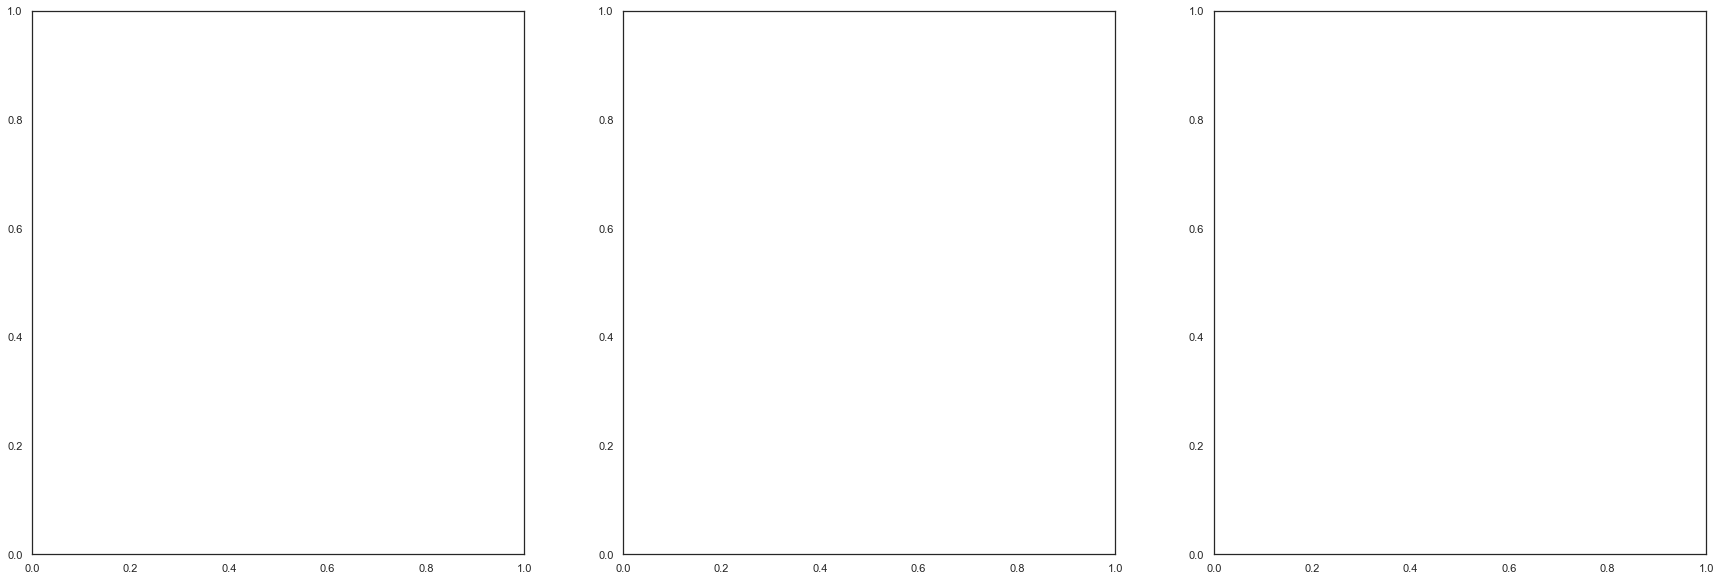

In [28]:
# group_means = average_across_animals_transition_matrix(AA_transits)

x_axis_labels = ['Port 1','Port 2','Port 3','Port 4'] # labels for x-axis
y_axis_labels = ['Port Z','Port Y','Port X','Port 5','Port 4','Port 3','Port 2','Port 1'] # labels for y-axis
labels =  np.array([['','','',''],
                    ['','','',''],
                    ['','','',''],
                    ['','','','T4'],
                    ['','','T3',''],
                    ['','T2','',''],
                    ['T1','','',''],
                    ['','','','']])

mask = np.zeros_like(Port_transits)
# mask[4][3] = 1
# mask[5][2] = 1
# mask[6][1] = 1
# mask[7][0] = 1


#plot:

with sns.axes_style("white"):
    

    fig, ax1 = plt.subplots(1, 3, figsize=(30, 10))

    h1 = sns.heatmap(Port_transits,xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                    linewidths=.5, mask=mask, square=True,cmap="YlGnBu",annot = labels,fmt = '',ax=ax1,cbar_kws = dict(use_gridspec=False,location="right"))

    ax1.set_ylabel('End Port',size = 20)
    ax1.set_xlabel('Start Port',size = 20)

    ax1.set_title('Early learning', loc = 'left',pad = 20,fontsize = 20,color = 'firebrick')


In [21]:
AA_transits = [[],[],[]]


for Animal_index, CurrentAnimal in enumerate(Animal_ID):

    InputPathCurrent = (InputPath + CurrentAnimal+'\\')
    
    #load data:

    if not os.path.isdir(InputPathCurrent):
        print('Error, do single animal anlysis first!')
        
    with open (InputPathCurrent + CurrentAnimal + '_processed_lesion_data' , 'rb') as fp:
        loaded_df = pickle.load(fp) 

    for i in range(3):
        group_data = loaded_df.loc[i,:]
        
        AA_transits[i] = AA_transits[i] + [list(group_data['transition_matrix'])]

[[442, 71, 7, 1, 0, 47, 24, 1],
 [86, 20, 20, 1, 1, 454, 2, 0],
 [5, 19, 442, 0, 0, 57, 40, 0],
 [7, 42, 36, 1, 0, 0, 523, 0]]

In [29]:
## Tanrasition Heatmap Plot:   
#put data into correct format
port1_transits = []
for i in range(((port1*8)-8),((port1*8)-8)+8):
    port1_transits = port1_transits + [transition_number[i]]
port2_transits = []
for i in range(((port2*8)-8),((port2*8)-8)+8):
    port2_transits = port2_transits + [transition_number[i]]
port3_transits = []
for i in range(((port3*8)-8),((port3*8)-8)+8):
    port3_transits = port3_transits + [transition_number[i]]
port4_transits = []
for i in range(((port4*8)-8),((port4*8)-8)+8):
    port4_transits = port4_transits + [transition_number[i]]
port_transits = [port1_transits] + [port2_transits] + [port3_transits] + [port4_transits]
# reorder data so that it is correct for heatmap:
a = np.array([0,1,2,3,4,5,6,7])
a = np.delete(a, [port1-1,port2-1,port3-1,port4-1,port5-1])
new_order = [port1-1] + [port2-1] + [port3-1] + [port4-1] + [port5-1] + list(a)
reordered_port_transits = []
for i in range(1,len(port_transits)+1):
    mylist = port_transits[-i]
    myorder = new_order
    mylist = [mylist[i] for i in myorder]
    newlist = []
    for item in mylist:
        newlist = newlist + [float(item)]
    reordered_port_transits = reordered_port_transits + [newlist]
#restructure data to swap x and y axis:
data = [[],[],[],[],[],[],[],[]]
for ind in range(8):
    for index,item in enumerate(reordered_port_transits):
        data[ind] = data[ind] + [item[len(item)-1-ind]]
for i in range(8):
    data[i].reverse()
x_axis_labels = ['Port 1','Port 2','Port 3','Port 4'] # labels for x-axis
y_axis_labels = ['Port Z','Port Y','Port X','Port 5','Port 4','Port 3','Port 2','Port 1'] # labels for y-axis
labels =  np.array([['','','',''],
                    ['','','',''],
                    ['','','',''],
                    ['','','','T4'],
                    ['','','T3',''],
                    ['','T2','',''],
                    ['T1','','',''],
                    ['','','','']])
mask = np.zeros_like(data)
mask[4][3] = 1
mask[5][2] = 1
mask[6][1] = 1
mask[7][0] = 1
#plot:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5, 15))
    ax = sns.heatmap(data,xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
            linewidths=.5, mask=mask, square=True,cmap="YlGnBu",annot = labels,fmt = '',cbar_kws = dict(use_gridspec=False,location="top"))

#add seprrating line:
ax.hlines([3], *ax.get_ylim())
#labels:
plt.ylabel('End Port',size = 20)
plt.xlabel('Start Port',size = 20)
fig = ax.get_figure()
# #save

NameError: name 'transition_number' is not defined

In [30]:
transition_number = []
for transit_types in TransitionTypesIndex:
    temp = (np.where(trajects == float(transit_types)))
    transition_number.append(len(temp[0]))

NameError: name 'trajects' is not defined